In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import  cm
%matplotlib inline
import seaborn as sns

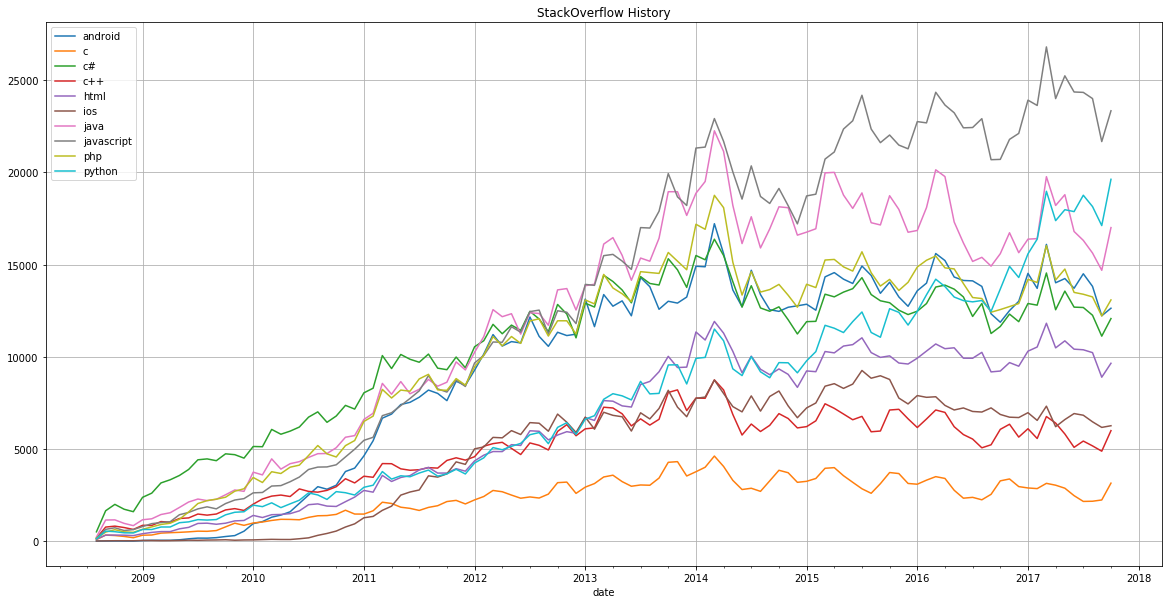

In [7]:
#Realizar la carga de datos
df = pd.read_csv('files/date_tag_count.csv')
# Cambiar String a DateTime
df.m = pd.to_datetime(df.m)
# Clasificar columna TagName
df = df.pivot(index='m',columns='TagName', values='count')
# Renombrar la columna para hacerla mas legible
df.index.rename('date', inplace=True)
df = df.reset_index()
del df.columns.name
df = df.iloc[1:,:] #eliminamos la primera columna por falta de datos

df.set_index('date', inplace=True)
# Generar gráfico
fig, ax = plt.subplots(figsize=(20,10))
df.plot(ax=ax, legend=True, title='StackOverflow History', grid=True)

# Guardar gráfico
# plt.savefig('/home/david/stack_historical.png', transparent=True, format='png', dpi=fig.dpi)

In [8]:
df.head(10)

,android,c,c#,c++,html,ios,java,javascript,php,python
date,,,,,,,,,,
2008-08-01,4.0,85.0,506.0,163.0,109.0,9.0,221.0,164.0,162.0,126.0
2008-09-01,9.0,330.0,1649.0,764.0,329.0,16.0,1146.0,641.0,490.0,546.0
2008-10-01,11.0,305.0,1995.0,815.0,330.0,24.0,1155.0,725.0,622.0,514.0
2008-11-01,8.0,257.0,1732.0,739.0,325.0,24.0,965.0,576.0,506.0,454.0
2008-12-01,6.0,187.0,1598.0,636.0,302.0,22.0,842.0,628.0,479.0,444.0
2009-01-01,33.0,323.0,2376.0,859.0,405.0,40.0,1161.0,791.0,642.0,634.0
2009-02-01,48.0,334.0,2604.0,853.0,475.0,36.0,1213.0,951.0,773.0,633.0
2009-03-01,49.0,436.0,3158.0,1062.0,519.0,27.0,1445.0,1009.0,905.0,768.0
2009-04-01,48.0,460.0,3330.0,1027.0,520.0,31.0,1542.0,1055.0,972.0,769.0


### Second Try

In [13]:
df = pd.read_csv('files/stof_unstack.csv')
df.date = pd.to_datetime(df.date)
df.set_index('date', inplace=True)

In [17]:
year = df.groupby(pd.Grouper(freq='Y')).sum() 
year.index = year.index.map(lambda x: x.year)
year #.to_csv('files/stof_by_year.csv')


,android,c,c#,c++,html,ios,java,javascript,php,python
date,,,,,,,,,,
2008,38.0,1164.0,7480.0,3117.0,1395.0,95.0,4329.0,2734.0,2259.0,2084.0
2009,1994.0,6795.0,46085.0,15769.0,9384.0,594.0,24061.0,18738.0,20515.0,12924.0
2010,27413.0,15328.0,75760.0,32096.0,21010.0,3731.0,54681.0,43585.0,51969.0,27169.0
2011,87314.0,22689.0,113660.0,48277.0,42194.0,33251.0,99741.0,90554.0,97089.0,42396.0
2012,130299.0,31172.0,139602.0,63562.0,64136.0,71140.0,145922.0,137185.0,133304.0,64565.0
2013,155947.0,40940.0,166643.0,82752.0,98288.0,82307.0,192517.0,197426.0,169801.0,96958.0
2014,167444.0,42121.0,164289.0,83364.0,119975.0,91554.0,219327.0,237731.0,181110.0,117103.0
2015,165236.0,40396.0,156097.0,80433.0,120681.0,99492.0,217251.0,257412.0,173629.0,138057.0
2016,164483.0,35148.0,152115.0,72739.0,119499.0,86785.0,201748.0,269690.0,166057.0,161471.0


In [31]:
df.sum()

android       1039619.0
c              262698.0
c#            1148864.0
c++            539301.0
html           700104.0
ios            535234.0
java          1329531.0
javascript    1496325.0
php           1134315.0
python         840515.0
dtype: float64